In [21]:
import pandas as pd
import numpy as np
import numpy.linalg as lia
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

In [4]:
#Task_1_a
dataset=pd.read_csv("winequality-white.csv",sep=';',decimal='.')
#print(dataset)
#print(dataset.head())
#print(dataset.tail())
#Number of Datapoints 
print('Number of Datapoints in the Dataset: ',dataset.shape[0])

Number of Datapoints in the Dataset:  4898


In [5]:
#Task_1_b
print('Number of features considering "quality" as class label: ',pd.unique(dataset['quality']).size, pd.unique(dataset['quality']))
q_dpoints = dataset.pivot_table(index=['quality'], aggfunc='size')
print('Number of data points in each class: \n', q_dpoints)

Number of features considering "quality" as class label:  7 [6 5 7 8 4 3 9]
Number of data points in each class: 
 quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


In [17]:
#Task_1_c
white_wine = shuffle(dataset, random_state=2)
print(white_wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3732            7.5              0.28         0.41            1.30      0.044   
2981            8.5              0.23         0.28           11.10      0.033   
1247            7.2              0.21         0.34            1.10      0.046   
1835            8.0              0.55         0.42           12.60      0.211   
4432            6.7              0.24         0.26            5.40      0.030   
...             ...               ...          ...             ...        ...   
3335            6.9              0.38         0.29           13.65      0.048   
1099            5.8              0.29         0.21            2.60      0.025   
2514            6.9              0.34         0.30            4.70      0.029   
3606            6.4              0.38         0.24            7.20      0.047   
2575            6.7              0.17         0.42           10.40      0.038   

      free sulfur dioxide  

Text(0, 0.5, 'Alcohol')

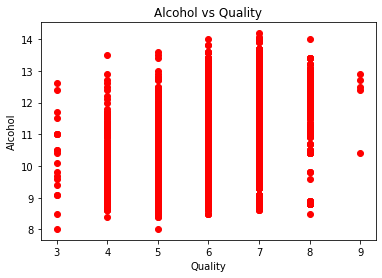

In [20]:
#Task_1_d
x=np.array(dataset['quality'])
y=np.array(dataset['alcohol'])
plt.scatter(x,y,marker='o',color='red')
plt.title('Alcohol vs Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')

In [26]:
#Task_2_a
pca=PCA(n_components=dataset.shape[1])
proj=pca.fit_transform(white_wine)
print(proj)

[[-1.85138702e+01 -2.02945289e+01 -3.86405326e+00 ...  8.92937261e-03
  -5.28652847e-03 -3.87872902e-04]
 [-4.10338258e+01  5.81190048e+00  6.61046718e+00 ... -3.27412710e-02
  -3.82059203e-03 -9.81495088e-04]
 [-5.92106776e+01  5.31112526e+00 -2.55606029e+00 ... -2.94740462e-02
   7.49560109e-03  6.56212693e-04]
 ...
 [ 8.84236806e+00 -3.79577927e+00 -2.22118004e+00 ...  4.64370239e-02
  -3.75582681e-03 -3.13125141e-04]
 [ 1.37299298e+01  2.16837544e+00  2.25164243e-01 ...  5.97713226e-02
  -1.08078481e-02  6.25958803e-04]
 [ 5.52841154e+01  3.65237806e+01  9.44807575e-01 ... -2.76114372e-02
  -1.93170563e-02 -8.32359631e-05]]


In [ ]:
#Task_2_b
